In [1]:
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go
import pandas as pd
np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

print('Tensorflow version: ', tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df_Toilet = pd.read_csv('feed.Toilet.csv',sep=' ')
df_Bidet = pd.read_csv('feed_Bidet.MYD.csv',sep=' ',names=['Time', 'Flow'])
df_Dishwasher = pd.read_csv('feed_Dishwasher30.MYD.csv',sep=' ')
df_Kitchenfaucet = pd.read_csv('feed_Kitchenfaucet.MYD.csv',sep=' ',names=['Time', 'Flow'])
df_Shower = pd.read_csv('feed_Shower.MYD.csv',sep=' ',names=['Time', 'Flow'])
df_Washbasin = pd.read_csv('feed_Washbasin.MYD.csv',sep=' ',names=['Time', 'Flow'])
df_Washingmachine = pd.read_csv('feed_Washingmachine.MYD.csv',sep=' ',names=['Time', 'Flow'])
df_WholeHouse = pd.read_csv('feed_WholeHouse.MYD.csv',sep=' ',names=['Time', 'Flow'])


In [ ]:
df_Toilet.columns
df_Toilet = df_Toilet[['Time', 'Flow']]

In [ ]:
df_Bidet.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
df_Dishwasher.columns
df_Dishwasher = df_Dishwasher[['Time', 'Flow']]

In [ ]:
df_Kitchenfaucet.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
df_Shower.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
df_Washbasin.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
df_Washingmachine.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
df_WholeHouse.columns

Index(['Time', 'Flow'], dtype='object')

In [ ]:
result_df = pd.merge(df_Toilet[['Time', 'Flow']], df_Bidet[['Time', 'Flow']], on='Time',how='outer')
result_df.columns = ['Time', 'df_Toilet_Flow', 'df_Bidet_Flow']


result_df2 = pd.merge(df_Dishwasher[['Time', 'Flow']], df_Kitchenfaucet[['Time', 'Flow']], on='Time',how='outer')
result_df2.columns = ['Time', 'df_Dishwasher_Flow', 'df_Kitchenfaucet_Flow']


result_df3 = pd.merge(df_Shower[['Time', 'Flow']], df_Washbasin[['Time', 'Flow']], on='Time',how='outer')
result_df3.columns = ['Time', 'df_Shower_Flow', 'df_Washbasin_Flow']


result_df4 = pd.merge(df_Washingmachine[['Time', 'Flow']], df_WholeHouse[['Time', 'Flow']], on='Time',how='outer')
result_df4.columns = ['Time', 'df_Washingmachinet_Flow', 'df_WholeHouse_Flow']


result_df12 = pd.merge(result_df[['Time', 'df_Toilet_Flow', 'df_Bidet_Flow']], result_df2[['Time', 'df_Dishwasher_Flow', 'df_Kitchenfaucet_Flow']], on='Time',how='outer')
result_df34 = pd.merge(result_df3[['Time', 'df_Shower_Flow', 'df_Washbasin_Flow']], result_df4[['Time', 'df_Washingmachinet_Flow', 'df_WholeHouse_Flow']], on='Time',how='outer')
df= pd.merge(result_df12[['Time', 'df_Toilet_Flow', 'df_Bidet_Flow', 'df_Dishwasher_Flow', 'df_Kitchenfaucet_Flow']], result_df34[['Time', 'df_Shower_Flow', 'df_Washbasin_Flow', 'df_Washingmachinet_Flow', 'df_WholeHouse_Flow']], on='Time',how='outer')
df

,Time,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow
0,1551112805,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1551136662,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1551163319,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1551181357,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1551201563,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
423402,1598783652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423403,1598784254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423404,1598784860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423405,1598785466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.shape

(423407, 9)

In [ ]:
df.fillna(0)

,Time,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow
0,1551112805,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1551136662,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1551163319,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1551181357,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1551201563,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
423402,1598783652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423403,1598784254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423404,1598784860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423405,1598785466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.dtypes

Time                         int64
df_Toilet_Flow             float64
df_Bidet_Flow              float64
df_Dishwasher_Flow         float64
df_Kitchenfaucet_Flow      float64
df_Shower_Flow             float64
df_Washbasin_Flow          float64
df_Washingmachinet_Flow    float64
df_WholeHouse_Flow         float64
dtype: object

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [ ]:
df.dtypes

Time                       datetime64[ns]
df_Toilet_Flow                    float64
df_Bidet_Flow                     float64
df_Dishwasher_Flow                float64
df_Kitchenfaucet_Flow             float64
df_Shower_Flow                    float64
df_Washbasin_Flow                 float64
df_Washingmachinet_Flow           float64
df_WholeHouse_Flow                float64
dtype: object

In [ ]:
df

,Time,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow,Sum
0,2019-02-25 16:40:05,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
1,2019-02-25 23:17:42,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
2,2019-02-26 06:41:59,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,2019-02-26 11:42:37,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
4,2019-02-26 17:19:23,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...
423402,2020-08-30 10:34:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
423403,2020-08-30 10:44:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
423404,2020-08-30 10:54:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
423405,2020-08-30 11:04:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
#filtered_df = df[df['Time'] <= '2020-08-27']
result_df = df.groupby(pd.Grouper(key='Time', freq='h')).sum().reset_index()


In [ ]:
result_df

,Time,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow,Sum
0,2019-02-13 08:00:00,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,177.0
1,2019-02-13 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-02-13 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-02-13 11:00:00,0.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,298.0
4,2019-02-13 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14788,2020-10-21 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14789,2020-10-21 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14790,2020-10-21 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14791,2020-10-21 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result_df['Sum'] = result_df.drop('Time', axis=1).sum(axis=1)

In [ ]:

# Drop rows where 'Sum' is equal to zero
result_df = result_df[result_df['Sum'] != 0]


In [ ]:
result_df

,Time,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow,Sum
0,2019-02-13 08:00:00,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,354.0
3,2019-02-13 11:00:00,0.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,596.0
80,2019-02-16 16:00:00,0.0,1207.0,0.0,0.0,0.0,152.0,0.0,0.0,2718.0
81,2019-02-16 17:00:00,0.0,2.0,0.0,0.0,0.0,933.0,0.0,0.0,1870.0
84,2019-02-16 20:00:00,0.0,0.0,0.0,0.0,0.0,1312.0,0.0,0.0,2624.0
...,...,...,...,...,...,...,...,...,...,...
14660,2020-10-16 04:00:00,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
14711,2020-10-18 07:00:00,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
14714,2020-10-18 10:00:00,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
14783,2020-10-21 07:00:00,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0


<ipython-input-213-5e8126aba5be>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-213-5e8126aba5be>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



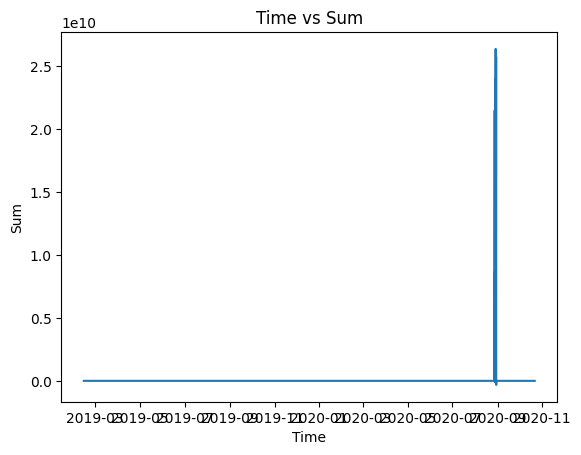

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert 'Time' column to datetime format (if not done already)
result_df['Time'] = pd.to_datetime(result_df['Time'], unit='s')

# Sum all columns for each row (excluding the 'Time' column)
result_df['Sum'] = result_df.drop('Time', axis=1).sum(axis=1)

# Plot 'Time' versus the sum
plt.plot(result_df['Time'], result_df['Sum'])
plt.xlabel('Time')
plt.ylabel('Sum')
plt.title('Time vs Sum')
plt.show()

In [ ]:
result_df.describe()

,df_Toilet_Flow,df_Bidet_Flow,df_Dishwasher_Flow,df_Kitchenfaucet_Flow,df_Shower_Flow,df_Washbasin_Flow,df_Washingmachinet_Flow,df_WholeHouse_Flow,Sum
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2.312000e+03,2.312000e+03
mean,6.145329,311.189879,0.229412,760.148356,1530.602509,896.694204,731.822232,7.336691e+07,2.201134e+08
std,7.692465,1047.991929,1.542206,2144.079369,6333.995059,2669.107419,4321.765335,6.502423e+08,1.950726e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.077166e+08,-3.231497e+08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.600000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,2.250000e+03
75%,12.000000,9.000000,0.000000,344.500000,0.000000,749.250000,0.000000,0.000000e+00,1.138590e+04
max,60.000000,27986.000000,20.400000,27344.000000,66050.000000,75878.000000,48670.000000,8.780001e+09,2.634000e+10


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_df['Time'], y=result_df['Sum'], name='Close price'))
fig.update_layout(showlegend=True, title='Johnson and Johnson Stock Price 1985-2020')
fig.show()

In [ ]:
result_df=result_df[['Time','Sum']]

In [ ]:
train, test = result_df.loc[result_df['Time'] <= '2019-10-28'], result_df.loc[result_df['Time'] > '2020-07-05']

In [ ]:
train.tail()

,Time,Sum
6148,2019-10-27 12:00:00,22239.0
6156,2019-10-27 20:00:00,774.0
6157,2019-10-27 21:00:00,2289.0
6158,2019-10-27 22:00:00,58155.0
6159,2019-10-27 23:00:00,45033.0


In [ ]:
test.head()

,Time,Sum
12197,2020-07-05 13:00:00,36.0
12198,2020-07-05 14:00:00,36.0
12200,2020-07-05 16:00:00,36.0
12203,2020-07-05 19:00:00,36.0
12213,2020-07-06 05:00:00,72.0


In [ ]:
train.shape,test.shape

((1833, 2), (466, 2))

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Sum']])

train['Sum'] = scaler.transform(train[['Sum']])
test['Sum'] = scaler.transform(test[['Sum']])

<ipython-input-221-3f19f61279c4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-221-3f19f61279c4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])

    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['Sum']], train['Sum'])
X_test, y_test = create_sequences(test[['Sum']], test['Sum'])

In [ ]:
print(f'Training shape: {X_train.shape}')

print(f'Testing shape: {X_test.shape}')

Training shape: (1803, 30, 1)
Testing shape: (436, 30, 1)


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_3 (RepeatVec  (None, 30, 128)           0         
 tor)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_7 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 1)             129       
 stributed)                                           

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
51/51 [==============================] - 7s 76ms/step - loss: 0.4665 - val_loss: 0.6918
Epoch 2/100
51/51 [==============================] - 4s 76ms/step - loss: 0.4400 - val_loss: 0.6888
Epoch 3/100
51/51 [==============================] - 3s 61ms/step - loss: 0.4393 - val_loss: 0.6854
Epoch 4/100
51/51 [==============================] - 3s 61ms/step - loss: 0.4375 - val_loss: 0.6842
Epoch 5/100
51/51 [==============================] - 4s 76ms/step - loss: 0.4366 - val_loss: 0.6836
Epoch 6/100
51/51 [==============================] - 3s 67ms/step - loss: 0.4364 - val_loss: 0.6831
Epoch 7/100
51/51 [==============================] - 3s 62ms/step - loss: 0.4358 - val_loss: 0.6827
Epoch 8/100
51/51 [==============================] - 3s 62ms/step - loss: 0.4356 - val_loss: 0.6824
Epoch 9/100
51/51 [==============================] - 4s 83ms/step - loss: 0.4353 - val_loss: 0.6826
Epoch 10/100
51/51 [==============================] - 3s 61ms/step - loss: 0.4351 - val_loss: 0.6822

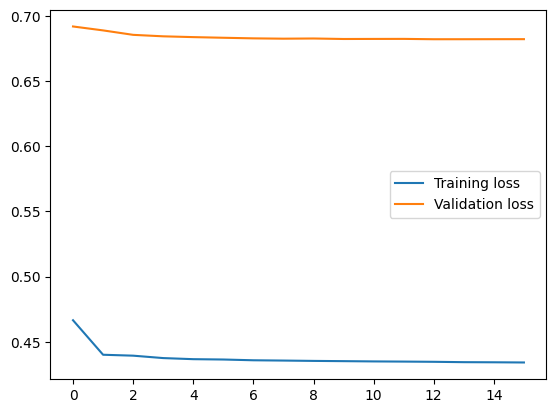

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 1s 18ms/step - loss: 40974.2578


40974.2578125

Reconstruction error threshold: 1.255304159721867


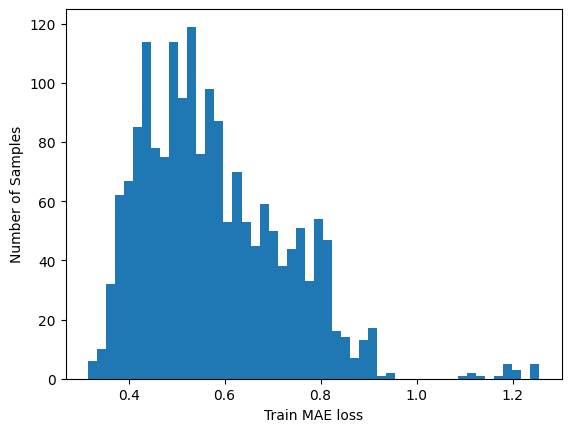

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

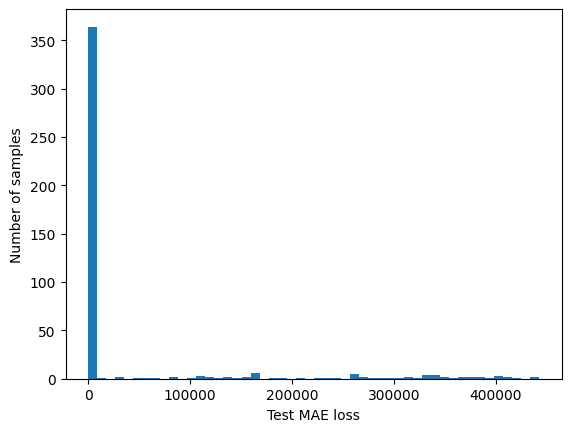

In [ ]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [ ]:
test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['Sum'] = test[TIME_STEPS:]['Sum']

In [ ]:
test_score_df.tail()

,Time,Sum,loss,threshold,anomaly
14660,2020-10-16 04:00:00,-0.485557,0.640190,1.255304,False
14711,2020-10-18 07:00:00,-0.485557,0.640506,1.255304,False
14714,2020-10-18 10:00:00,-0.485557,0.640871,1.255304,False
14783,2020-10-21 07:00:00,-0.485557,0.604693,1.255304,False
14792,2020-10-21 16:00:00,-0.485557,0.560271,1.255304,False


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Time'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['Time'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [ ]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.head()

,Time,Sum,loss,threshold,anomaly
13473,2020-08-27 17:00:00,459241.281327,2164.542513,1.255304,True
13474,2020-08-27 18:00:00,368843.946292,17472.561015,1.255304,True
13475,2020-08-27 19:00:00,466494.113806,29767.359968,1.255304,True
13476,2020-08-27 20:00:00,545862.162565,45317.164634,1.255304,True
13477,2020-08-27 21:00:00,727859.309879,63512.570983,1.255304,True


In [ ]:
anomalies.shape

(76, 5)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Time'], y=scaler.inverse_transform(test_score_df['Sum']), name='Close price'))
fig.add_trace(go.Scatter(x=anomalies['Time'], y=scaler.inverse_transform(anomalies['Sum']), mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

ValueError: ignored

In [ ]:
import pickle

# Assuming your anomaly detection model is stored in the variable 'anomaly_model'
# You need to replace 'anomaly_model' with the actual variable name of your model

# Save the model to a file
# with open('anomaly_model.pkl', 'wb') as file:
#     pickle.dump(model, file)
model.save('anomaly_model.h5')
